In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
import itertools
import math
from sklearn.model_selection import train_test_split, StratifiedKFold

%matplotlib inline

pd.set_option("display.max_rows", 6)

np.random.seed(2)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


In [52]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train_X = train.iloc[:,1:]
train_y = train['label']

print(train_X.shape)
print(train_y.shape)
print(test.shape)

del train 

(42000, 784)
(42000,)
(28000, 784)


In [53]:
train_y.value_counts()

1    4684
7    4401
3    4351
     ... 
4    4072
8    4063
5    3795
Name: label, Length: 10, dtype: int64

In [54]:
train_X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [55]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [56]:
# Normalize the data
train_X = train_X / 255.0
test = test / 255.0

In [57]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
train_X = train_X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [58]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
train_y = to_categorical(train_y, num_classes = 10)

In [48]:

folds = list(StratifiedKFold(n_splits=7, shuffle=True, random_state=1).split(train_X, train_y))


In [11]:
# Split the train and the validation set for the fitting
#train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.33)

In [12]:
#print(train_X.shape)
#print(val_X.shape)
#print(train_y.shape)
#print(val_y.shape)
#print(test.shape)

(28140, 28, 28, 1)
(13860, 28, 28, 1)
(28140, 10)
(13860, 10)
(28000, 28, 28, 1)


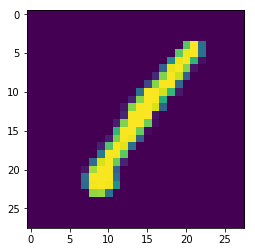

In [59]:
g = plt.imshow(train_X[0][:,:,0])

In [71]:
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

opt = Adam(lr=0.03, decay=0.01)

model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [74]:
epochs_per_fold = 4

In [ ]:
histories = []
for fold in folds:
    history = model.fit(train_X, train_y, epochs = epochs_per_fold, validation_data = (val_X, val_y), verbose = 2, batch_size=64)
    histories.append(history)

Train on 42000 samples, validate on 13860 samples
Epoch 1/4
 - 11s - loss: 0.0849 - acc: 0.9735 - val_loss: 0.0644 - val_acc: 0.9810
Epoch 2/4
 - 11s - loss: 0.0799 - acc: 0.9744 - val_loss: 0.0582 - val_acc: 0.9828
Epoch 3/4
 - 11s - loss: 0.0755 - acc: 0.9760 - val_loss: 0.0559 - val_acc: 0.9835
Epoch 4/4


In [ ]:
# Plot the loss and accuracy curves for training and validation 
for history in histories:
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)


In [ ]:

# Predict the values from the validation dataset
Y_pred = model.predict(val_X)
# Convert predictions classes to one hot vectors 

print('RMSE = %.6f' % math.sqrt(mean_squared_error(Y_pred, val_y)))

# 10 epoche: RMSE = 0.049072


In [ ]:
test_y = model.predict(test)


In [ ]:
test_y = test_y.round()

In [ ]:
test_y = model.predict(test)
test_y = test_y.round()
out_label = [ np.argmax(i) for i in test_y]
out_imageid = [ i+1 for i in range(len(test_y))]
out = pd.DataFrame()
out['ImageId'] = out_imageid
out['Label'] = out_label

out.to_csv('submission.csv', index=False)
out